In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')

In [ ]:
df= pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

# Diabetes

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

## Types of diabetes

### Type 1 diabetes
If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

### Type 2 diabetes
If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.


### Gestational diabetes
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

## What health problems can people with diabetes develop?
* heart disease
* stroke
* kidney disease
* eye problems
* dental disease
* nerve damage
* foot problems


source - https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes

In [ ]:
df.head()

# EDA on the dataset

### Affect of Glucose and BP

As blood with high glucose levels travels through the body, it can cause widespread damage, including to the blood vessels and kidneys. These organs play a key role in maintaining healthy blood pressure. If they experience damage, blood pressure can rise, increasing the risk of further harm and complications.

source - https://www.medicalnewstoday.com/articles/317220

In [ ]:
sns.jointplot('Glucose','BloodPressure',data=df,kind='hex')

### Affect of Glucose and Insulin

Insulin helps your body turn blood sugar (glucose) into energy. It also helps your body store it in your muscles, fat cells, and liver to use later, when your body needs it. After you eat, your blood sugar (glucose) rises. This rise in glucose triggers your pancreas to release insulin into the bloodstream.

source - https://wa.kaiserpermanente.org/healthAndWellness/index.jhtml?item=/common/healthAndWellness/conditions/diabetes/insulinProcess.html

In [ ]:
sns.jointplot('Glucose','Insulin',data=df,kind='hex')

### Age and BMI

A disorder involving excessive body fat that increases the risk of health problems.
Obesity often results from taking in more calories than are burned by exercise and normal daily activities.
Obesity occurs when a person's body mass index is 25 or greater. The excessive body fat increases the risk of serious health problems.
The mainstay of treatment is lifestyle changes such as diet and exercise.


In [ ]:
sns.jointplot('BMI','Age',data=df,kind='hex')

### Correlation between all the features

In [ ]:
sns.pairplot(df.drop('Outcome',axis=1))

In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

# Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Evaluation metrics 

## Confusion Matrix

The confusion matrix is used to describe the performance of a classification model on a set of test data for which true values are known.

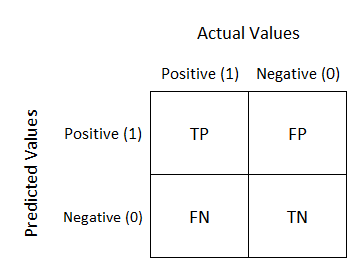


* True positive(TP).: This shows that a model correctly predicted Positive cases as Positive. eg an illness is diagnosed as present and truly is present.

* False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.eg an illness is diagnosed as present and but is absent. (Type I error)

* False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.eg an illness is diagnosed as absent and but is present. (Type II error)

* True Negative(TN): This shows that a model correctly predicted Negative cases as Positive. eg an illness is diagnosed as absent and truly is absent.

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train,y_train)

In [ ]:
pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix for Logistic Regression")
print(confusion_matrix(y_test,pred))

print('\n\n')
print('Classification Report')
print(classification_report(y_test,pred))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=5)
knn.fit(X_train,y_train)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
print('Confusion matrix for KNN with n = 5')
print(confusion_matrix(y_test,knn_pred))

print('\n\n')
print('Classification Report')
print(classification_report(y_test,knn_pred))

In [ ]:
error_rate=[]

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
k_pred = knn.predict(X_test)

print('Confusion matrix for KNN with n = 10')
print(confusion_matrix(y_test,k_pred))

print('\n\n')
print('Classification Report')
print(classification_report(y_test,k_pred))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()
#dtree.fit(X_train,y_train)

In [ ]:
dtree_params = {'max_leaf_nodes': list(range(2,100)),'min_samples_split':[2,3,4],'max_depth': list(range(1,20,2))}                                     

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),dtree_params,verbose=3,cv=5)
grid.fit(X_train,y_train)

In [ ]:
print('Best Estimators: {}'.format(grid.best_estimator_))
print('Best Parameters: {}'.format(grid.best_params_))
print('Best Score: {}'.format(grid.best_score_))

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print('confusion matrix of decision tree')
print(confusion_matrix(y_test,grid_pred))

print('\n\n')
print(classification_report(y_test,grid_pred))

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
#rfc.fit(X_train,y_train)


In [ ]:
#rfc_pred = rfc.predict(X_test)
param_grid = {'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3,cv=5)



In [ ]:
grid.fit(X_train,y_train)

In [ ]:
print('Best Estimators: {}'.format(grid.best_estimator_))
print('Best Parameters: {}'.format(grid.best_params_))
print('Best Score: {}'.format(grid.best_score_))

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print('confusion matrix random forest classifier')
print(confusion_matrix(y_test,grid_pred))

print('\n\n')
print(classification_report(y_test,grid_pred))

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

In [ ]:
nb_pred= nb.predict(X_test)

In [ ]:
print('confusion matrix gaussianNB')
print(confusion_matrix(y_test,nb_pred))

print('\n\n')
print(classification_report(y_test,nb_pred))

In [ ]:
from sklearn.svm import SVC


sv = SVC()
grid_param = {'C': [0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),grid_param,verbose=3)
grid.fit(X_train,y_train)


In [ ]:
print('Best Estimators: {}'.format(grid.best_estimator_))
print('Best Parameters: {}'.format(grid.best_params_))
print('Best Score: {}'.format(grid.best_score_))

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print('confusion matrix SVM with grid search')
print(confusion_matrix(y_test,grid_pred))
print('\n\n')
print(classification_report(y_test,grid_pred))